## Import

In [2]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from global_vars import chargement_df

## 4. Preprocessing

### 4.1 Homogénéisation de variables

- Homogénéisation de la variable 'an'
- Homogénéisation de la variable 'hrmn'

#### 4.1.1 Homogénéisation de la variable 'an'

In [ ]:
df = chargement_df()

In [ ]:
# Définir un dictionnaire de mapping pour convertir les valeurs de 'an'
mapping = {5: 2005, 6: 2006, 7: 2007, 8: 2008, 9: 2009, 10: 2010, 
           11: 2011, 12: 2012, 13: 2013, 14: 2014, 15: 2015, 
           16: 2016, 17: 2017, 18: 2018, 2019: 2019, 2020: 2020,
           2021: 2021, 2022: 2022}

# Appliquer la transformation en utilisant le mapping
df['an'] = df['an'].map(mapping)

# Vérifier les valeurs uniques après transformation
print("Valeurs uniques pour la colonne 'an' après transformation :")
print(df['an'].unique())
print(df['an'])

Valeurs uniques pour la colonne 'an' après transformation :
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022]
0          2005
1          2005
2          2005
3          2005
4          2005
           ... 
2636484    2022
2636485    2022
2636486    2022
2636487    2022
2636488    2022
Name: an, Length: 2636489, dtype: int64


#### 4.1.2 Homogénéisation de la variable hrmn

In [ ]:
# Définition de la fonction pour homogénéiser le format de l'heure
def homogenize_hour_format(row):
    # Convertir l'heure en chaîne de caractères
    hour_str = str(row['hrmn'])
    
    # Si l'année est comprise entre 2005 et 2018, ajuster le format de l'heure
    if row['an'] < 2019:
        # Extraire les deux derniers chiffres pour les minutes
        minutes = hour_str[-2:].zfill(2)
        
        # Les chiffres restants sont pour les heures
        hour = hour_str[:-2].zfill(2)
        
        # Concaténer avec ':' pour obtenir le format 'HH:MM'
        return f'{hour}:{minutes}'
    
    # Si l'année est 2019 ou plus, le format est déjà 'HH:MM'
    return hour_str

# Appliquer la fonction à la colonne 'hrmn'
df['hrmn'] = df.apply(homogenize_hour_format, axis=1)



In [ ]:
df.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,id_vehicule_x,secu1,secu2,secu3,id_usager,senc,catv,occutc,obs,obsm,choc,manv,id_vehicule_y,motor,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma
0,200500000001,1.0,1,4,1,1.0,11.0,0.0,0.0,0.0,1976.0,A01,NaN,NaN,NaN,NaN,NaN,0.0,7,0.0,0.0,2.0,1.0,1.0,NaN,NaN,2005,1,12,19:00,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,NaN
1,200500000001,1.0,1,3,2,3.0,11.0,0.0,0.0,0.0,1968.0,B02,NaN,NaN,NaN,NaN,NaN,0.0,7,0.0,0.0,2.0,8.0,10.0,NaN,NaN,2005,1,12,19:00,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,NaN
2,200500000001,2.0,2,1,1,0.0,11.0,0.0,0.0,0.0,1964.0,B02,NaN,NaN,NaN,NaN,NaN,0.0,7,0.0,0.0,2.0,8.0,10.0,NaN,NaN,2005,1,12,19:00,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,NaN
3,200500000001,4.0,2,1,1,0.0,31.0,0.0,0.0,0.0,2004.0,B02,NaN,NaN,NaN,NaN,NaN,0.0,7,0.0,0.0,2.0,8.0,10.0,NaN,NaN,2005,1,12,19:00,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,NaN
4,200500000001,5.0,2,1,1,0.0,11.0,0.0,0.0,0.0,1998.0,B02,NaN,NaN,NaN,NaN,NaN,0.0,7,0.0,0.0,2.0,8.0,10.0,NaN,NaN,2005,1,12,19:00,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0,NaN


### 4. Option Selection de la période 2014 à 2022

In [ ]:
# Filtrer les valeurs de 'an' supérieures à 2013
df = df.loc[df['an'] > 2013]

### 4.2 Suppression des lignes non renseignées pour la target : -301 lignes

In [ ]:
# Comptage des valeurs de la colonne 'grav'
count_values = df['grav'].value_counts(dropna=False)

# Nombre de valeurs manquantes
na_count = df['grav'].isna().sum()

# Calcul du pourcentage de chaque valeur de 'grav'
percentage_values = (count_values / len(df)) * 100

# Affichage des résultats
print("Décompte des valeurs de 'grav':")
print(count_values)
print("\nPourcentage de chaque valeur de 'grav':")
print(percentage_values)
print("\nNombre de valeurs manquantes (NA):", na_count)

Décompte des valeurs de 'grav':
grav
 1    1082803
 4     961920
 3     520836
 2      70629
-1        301
Name: count, dtype: int64

Pourcentage de chaque valeur de 'grav':
grav
 1    41.069885
 4    36.484886
 3    19.754909
 2     2.678904
-1     0.011417
Name: count, dtype: float64

Nombre de valeurs manquantes (NA): 0


In [ ]:
# Recherche des indices des lignes où 'grav' est égal à -1
indices_to_drop = df.index[df['grav'] == -1]

# Suppression des lignes correspondantes
df.drop(indices_to_drop, inplace=True)

### 4.3 Suppression des lignes doublons

In [ ]:
# Recherche de doublons
duplicates = df[df.duplicated()]

# Compte le nombre de lignes identiques
num_duplicates = len(duplicates)
print("Nombre de doublons trouvés :", num_duplicates)

Nombre de doublons trouvés : 2858


In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

### 4.3bis Suppression de Variables


In [ ]:
# Suppression des variables Ajout/Suppression 2019
df.drop(columns=['secu', 'secu1', 'secu2', 'secu3', 'motor', 'lartpc', 'env1', 'vma'], inplace=True)

In [ ]:
# Suppression des variables à forte proportion de NaN et -1
df.drop(columns=['occutc', 'lat', 'long', 'v1', 'v2', 'pr', 'pr1', 'larrout','gps'], inplace=True)

In [ ]:
# Suppression des variables dites techniques
df.drop(columns=['Num_Acc', 'num_veh', 'id_vehicule_y', 'id_vehicule_x', 'id_usager'], inplace=True)

In [ ]:
# Suppression des variables jugées non pertinentes
df.drop(columns=['adr', 'com', 'dep', 'voie', 'nbv'], inplace=True)

In [ ]:
# Suppression des variables présentant une catégorie dominantes
df.drop(columns=['actp', 'etatp', 'locp', 'obs', 'senc', 'trajet', 'vosp'], inplace=True)

In [ ]:
df.duplicated().value_counts()

False    2631960
True        1370
Name: count, dtype: int64

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
df.head()

,place,catu,grav,sexe,an_nais,catv,obsm,choc,manv,an,mois,jour,hrmn,lum,agg,int,atm,col,catr,circ,prof,plan,surf,infra,situ
0,1.0,1,3,1,1928.0,7,2.0,3.0,1.0,2018,1,24,15:05,1,1,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,0.0,1.0
1,1.0,1,1,1,1960.0,7,2.0,2.0,15.0,2018,1,24,15:05,1,1,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,0.0,1.0
2,1.0,1,1,1,1947.0,7,1.0,0.0,1.0,2018,2,12,10:15,1,2,7,7.0,7.0,4.0,2.0,1.0,2.0,1.0,0.0,1.0
3,NaN,3,4,1,1959.0,7,1.0,0.0,1.0,2018,2,12,10:15,1,2,7,7.0,7.0,4.0,2.0,1.0,2.0,1.0,0.0,1.0
4,1.0,1,3,1,1987.0,33,2.0,1.0,1.0,2018,3,4,11:35,1,2,3,1.0,7.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0


In [ ]:
# Sauvegarde de df
df_save = df

In [ ]:
df.shape

(1154558, 25)

In [ ]:
df = df_save

NameError: name 'df_save' is not defined

### 4.4 Réduction des catégories des variables

#### Modification de la variable catv

In [ ]:
# Création d'un dictionnaire pour mapper les nouvelles valeurs
new_catv_mapping = {
    1: [1, 50, 60, 80],
    2: [2, 4, 5, 30, 31, 32, 33, 34, 41, 42, 43],
    3: [7, 8, 9, 10, 11, 12],
    4: [13, 14, 15, 16, 17, 37, 38],
    5: [19, 20, 21, 35, 36, 39, 40, 99]
}
# Fonction pour mapper les nouvelles valeurs
def map_new_catv_value(old_value):
    for new_value, old_values in new_catv_mapping.items():
        if old_value in old_values:
            return new_value
    return None
# Supprimer la valeur 00
df = df[df['catv'] != 0]

# Appliquer la fonction de mapping pour créer les nouvelles valeurs
df['catv'] = df['catv'].apply(map_new_catv_value)

In [ ]:
df.duplicated().value_counts()

False    622283
True         23
Name: count, dtype: int64

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

#### Modification de la variable manv

In [ ]:
# Calculer le mode de la variable manv
mode_manv = df['manv'].mode()[0]

# Remplacer les valeurs -1 et 0 par le mode
df.loc[df['manv'].isin([-1, 0]), 'manv'] = mode_manv

In [ ]:
# Création d'un dictionnaire pour mapper les nouvelles valeurs
new_manv_mapping = {
    1: list(range(1, 11)),
    2: [11, 12],
    3: [13, 14],
    4: [15, 16],
    5: [17, 18],
    6: list(range(19, 27))
}

# Fonction pour mapper les nouvelles valeurs
def map_new_manv_value(old_value):
    for new_value, old_values in new_manv_mapping.items():
        if old_value in old_values:
            return new_value
    return None

# Appliquer la fonction de mapping pour créer les nouvelles valeurs
df['manv'] = df['manv'].apply(map_new_manv_value)

In [ ]:
df.duplicated().value_counts()

False    1153420
True         109
Name: count, dtype: int64

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

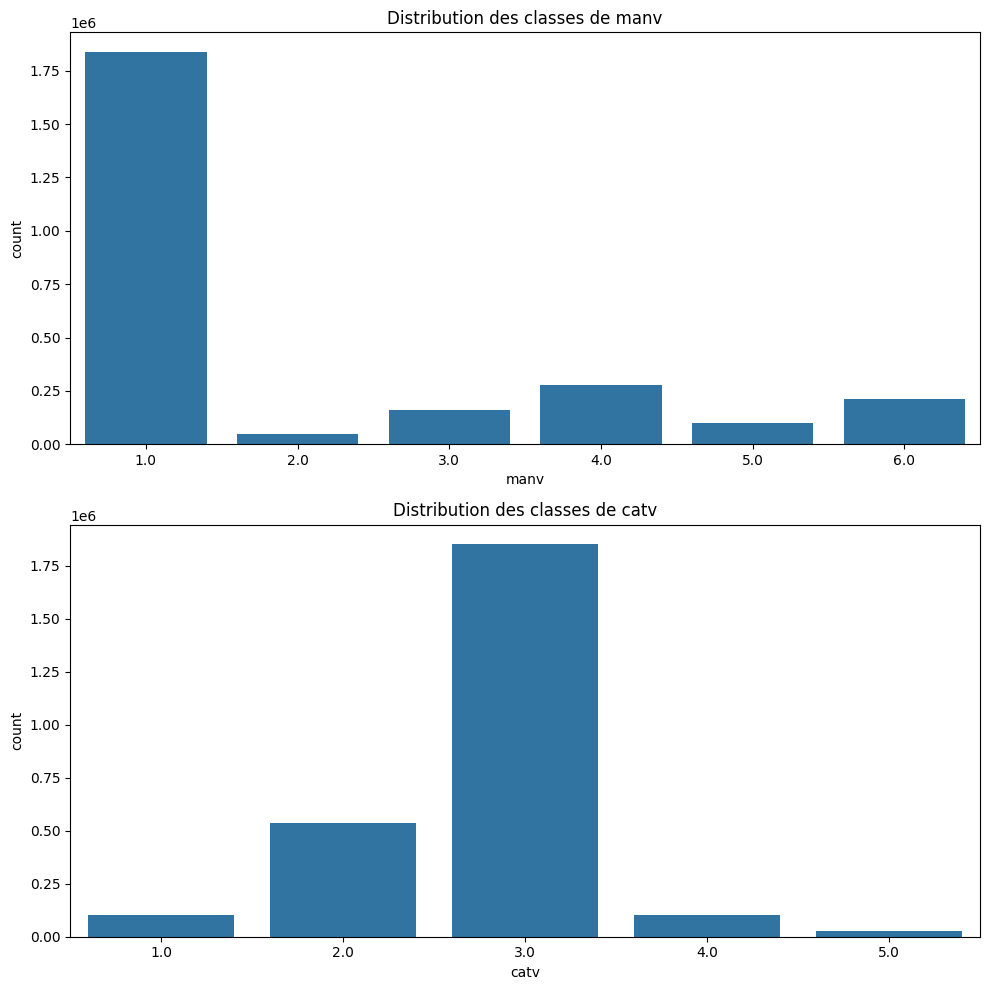

In [ ]:
# Création d'un subplot avec Seaborn
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Représentation graphique de manv
sns.countplot(x='manv', data=df, ax=axes[0])
axes[0].set_title('Distribution des classes de manv')

# Représentation graphique de catv
sns.countplot(x='catv', data=df, ax=axes[1])
axes[1].set_title('Distribution des classes de catv')

# Afficher les subplots
plt.tight_layout()
plt.show()

In [ ]:
df.shape

(622306, 25)

#### Variable obsm

In [ ]:
# Définir la fonction de transformation
def reduce_categories(x):
    if x == 0:
        return 1
    elif x == 1:
        return 2
    elif x == 2:
        return 3
    elif x in [4, 5, 6, 9]:
        return 4
    else:
        return np.nan

# Appliquer la transformation à la colonne 'obsm'
df['obsm'] = df['obsm'].apply(reduce_categories)

# Remplacer les valeurs manquantes par le mode le plus fréquent
mode_value = df['obsm'].mode()[0]
df['obsm'] = df['obsm'].fillna(mode_value)

C:\Users\campa\AppData\Local\Temp\ipykernel_25816\2455336654.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obsm'] = df['obsm'].apply(reduce_categories)
C:\Users\campa\AppData\Local\Temp\ipykernel_25816\2455336654.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obsm'] = df['obsm'].fillna(mode_value)


In [ ]:
locp_counts = df['obsm'].value_counts()
total_count = len(df['obsm'])
print("Valeurs uniques et leur décompte pour la variable 'obsm':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['obsm'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'obsm':", na_count)
print("Pourcentage de données manquantes pour la variable 'obsm': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'obsm':
3.0: 400484 (64.35%)
1.0: 118317 (19.01%)
2.0: 92926 (14.93%)
4.0: 10579 (1.70%)
Nombre de valeurs manquantes pour la variable 'obsm': 0
Pourcentage de données manquantes pour la variable 'obsm': 0.00%


#### Variable place

In [ ]:
# Définir la fonction de transformation
def reduce_categories(x):
    if x == 1:
        return 1
    elif x in [2, 3, 6]:
        return 2
    elif x in [4, 5, 7, 8, 9]:
        return 3
    elif x == 10:
        return 4
    else:
        return np.nan

# Appliquer la transformation à la colonne 'place'
df['place'] = df['place'].apply(reduce_categories)

# Remplacer les valeurs manquantes par le mode le plus fréquent
mode_value = df['place'].mode()[0]
df['place'] = df['place'].fillna(mode_value)

C:\Users\campa\AppData\Local\Temp\ipykernel_25816\2595020509.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['place'] = df['place'].apply(reduce_categories)
C:\Users\campa\AppData\Local\Temp\ipykernel_25816\2595020509.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['place'] = df['place'].fillna(mode_value)


In [ ]:
locp_counts = df['place'].value_counts()
total_count = len(df['place'])
print("Valeurs uniques et leur décompte pour la variable 'place':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['place'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'place':", na_count)
print("Pourcentage de données manquantes pour la variable 'place': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'place':
1.0: 472439 (75.92%)
2.0: 82957 (13.33%)
4.0: 38026 (6.11%)
3.0: 28884 (4.64%)
Nombre de valeurs manquantes pour la variable 'place': 0
Pourcentage de données manquantes pour la variable 'place': 0.00%


#### Variable int

Intersection :  
1 – Hors intersection  
2 – Intersection en X  
3 – Intersection en T  
4 – Intersection en Y  
5 – Intersection à plus de 4 branches  
6 – Giratoire  
7 – Place  
8 – Passage à niveau  
9 – Autre intersection  

In [ ]:
# Définir la fonction de transformation
def reduce_categories(x):
    if x == 1:
        return 1
    elif x in [2, 3, 4, 5, 8, 9]:
        return 2
    elif x == 6:
        return 3
    elif x == 7:
        return 4
    else:
        return np.nan

# Appliquer la transformation à la colonne 'int'
df['int'] = df['int'].apply(reduce_categories)

# Remplacer les valeurs manquantes par le mode le plus fréquent
mode_value = df['int'].mode()[0]
df['int'] = df['int'].fillna(mode_value)

C:\Users\campa\AppData\Local\Temp\ipykernel_25816\1811039585.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['int'] = df['int'].apply(reduce_categories)
C:\Users\campa\AppData\Local\Temp\ipykernel_25816\1811039585.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['int'] = df['int'].fillna(mode_value)


In [ ]:
locp_counts = df['int'].value_counts()
total_count = len(df['int'])
print("Valeurs uniques et leur décompte pour la variable 'int':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['int'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'int':", na_count)
print("Pourcentage de données manquantes pour la variable 'int': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'int':
1.0: 1825531 (69.24%)
2.0: 715997 (27.16%)
3.0: 73977 (2.81%)
4.0: 20984 (0.80%)
Nombre de valeurs manquantes pour la variable 'int': 0
Pourcentage de données manquantes pour la variable 'int': 0.00%


#### Variable situ

In [ ]:
def reduce_categories(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x in [2, 5, 6, 8]:
        return 4
    else:
        return np.nan

# Appliquer la transformation à la colonne 'situ'
df['situ'] = df['situ'].apply(reduce_categories)

# Remplacer les valeurs manquantes par le mode le plus fréquent
mode_value = df['situ'].mode()[0]
df['situ'] = df['situ'].fillna(mode_value)

C:\Users\campa\AppData\Local\Temp\ipykernel_25816\1701548283.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['situ'] = df['situ'].apply(reduce_categories)
C:\Users\campa\AppData\Local\Temp\ipykernel_25816\1701548283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['situ'] = df['situ'].fillna(mode_value)


In [ ]:
locp_counts = df['situ'].value_counts()
total_count = len(df['situ'])
print("Valeurs uniques et leur décompte pour la variable 'situ':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['situ'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'situ':", na_count)
print("Pourcentage de données manquantes pour la variable 'situ': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'situ':
1.0: 513364 (82.49%)
3.0: 75433 (12.12%)
4.0: 27289 (4.39%)
2.0: 6220 (1.00%)
Nombre de valeurs manquantes pour la variable 'situ': 0
Pourcentage de données manquantes pour la variable 'situ': 0.00%


#### Variable choc

In [ ]:
# Définir la fonction de transformation
def reduce_categories(x):
    if x == 0:
        return 1
    elif x in [1, 2, 3]:
        return 2
    elif x in [4, 5, 6, 7, 8]:
        return 3
    elif x == 9:
        return 4
    else:
        return np.nan  
    
    
# Appliquer la transformation à la colonne 'choc'
df['choc'] = df['choc'].apply(reduce_categories)

mode_value = df['choc'].mode()[0]
df['choc'] = df['choc'].fillna(mode_value)

C:\Users\campa\AppData\Local\Temp\ipykernel_25816\4010373032.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['choc'] = df['choc'].apply(reduce_categories)
C:\Users\campa\AppData\Local\Temp\ipykernel_25816\4010373032.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['choc'] = df['choc'].fillna(mode_value)


In [ ]:
locp_counts = df['choc'].value_counts()
total_count = len(df['choc'])
print("Valeurs uniques et leur décompte pour la variable 'choc':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['choc'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'choc':", na_count)
print("Pourcentage de données manquantes pour la variable 'choc': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'choc':
2.0: 400031 (64.28%)
3.0: 178139 (28.63%)
1.0: 33871 (5.44%)
4.0: 10265 (1.65%)
Nombre de valeurs manquantes pour la variable 'choc': 0
Pourcentage de données manquantes pour la variable 'choc': 0.00%


#### Variable atm

In [ ]:
def reduce_categories(x):
    if x in [1, 8, 9]:
        return 1
    elif x in [2, 3, 4]:
        return 2
    elif x in [5, 7]:
        return 3
    elif x == 6:
        return 4
    else:
        return np.nan
    
# Appliquer la transformation à la colonne 'atm'
df['atm'] = df['atm'].apply(reduce_categories)


mode_value = df['atm'].mode()[0]
df['atm'] = df['atm'].fillna(mode_value)

C:\Users\campa\AppData\Local\Temp\ipykernel_25816\1340906969.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['atm'] = df['atm'].apply(reduce_categories)
C:\Users\campa\AppData\Local\Temp\ipykernel_25816\1340906969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['atm'] = df['atm'].fillna(mode_value)


In [ ]:
locp_counts = df['atm'].value_counts()
total_count = len(df['atm'])
print("Valeurs uniques et leur décompte pour la variable 'atm':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['atm'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'atm':", na_count)
print("Pourcentage de données manquantes pour la variable 'atm': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'atm':
1.0: 522756 (84.00%)
2.0: 82187 (13.21%)
3.0: 15826 (2.54%)
4.0: 1537 (0.25%)
Nombre de valeurs manquantes pour la variable 'atm': 0
Pourcentage de données manquantes pour la variable 'atm': 0.00%


#### Variable catr

In [ ]:
def reduce_categories(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x == 4:
        return 4
    elif x in [5, 6, 7, 9]:
        return 5
    else:
        return np.nan
    
# Appliquer la transformation à la colonne 'catr'
df['catr'] = df['catr'].apply(reduce_categories)


mode_value = df['catr'].mode()[0]
df['catr'] = df['catr'].fillna(mode_value)

C:\Users\campa\AppData\Local\Temp\ipykernel_25816\284088075.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['catr'] = df['catr'].apply(reduce_categories)
C:\Users\campa\AppData\Local\Temp\ipykernel_25816\284088075.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['catr'] = df['catr'].fillna(mode_value)


In [ ]:
locp_counts = df['catr'].value_counts()
total_count = len(df['catr'])
print("Valeurs uniques et leur décompte pour la variable 'catr':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['catr'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'catr':", na_count)
print("Pourcentage de données manquantes pour la variable 'catr': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'catr':
4.0: 1219256 (46.25%)
3.0: 874037 (33.15%)
1.0: 243531 (9.24%)
2.0: 222505 (8.44%)
5.0: 77160 (2.93%)
Nombre de valeurs manquantes pour la variable 'catr': 0
Pourcentage de données manquantes pour la variable 'catr': 0.00%


#### Variable surf

In [ ]:
# Remplacer les valeurs manquantes par le mode le plus fréquent
mode_value = df['surf'].mode()[0]
df['surf'] = df['surf'].fillna(mode_value)

# Définir la fonction de transformation
def reduce_categories(x):
    if x == 1:
        return 1
    elif x in [2, 3, 4, 5, 6, 7, 8]:
        return 2
    elif x == 9:
        return 3
    else:
        return mode_value

# Appliquer la transformation à la colonne 'surf'
df['surf'] = df['surf'].apply(reduce_categories)

C:\Users\campa\AppData\Local\Temp\ipykernel_25816\3108241918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['surf'] = df['surf'].fillna(mode_value)
C:\Users\campa\AppData\Local\Temp\ipykernel_25816\3108241918.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['surf'] = df['surf'].apply(reduce_categories)


In [ ]:
locp_counts = df['surf'].value_counts()
total_count = len(df['surf'])
print("Valeurs uniques et leur décompte pour la variable 'surf':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['surf'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'surf':", na_count)
print("Pourcentage de données manquantes pour la variable 'surf': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'surf':
1.0: 2139218 (81.14%)
2.0: 485427 (18.41%)
3.0: 11844 (0.45%)
Nombre de valeurs manquantes pour la variable 'surf': 0
Pourcentage de données manquantes pour la variable 'surf': 0.00%


### 4.5 SimpleImputer - Imputation

In [ ]:
# Créer un imputer avec la stratégie du mode
imputer = SimpleImputer(strategy='most_frequent')

# Remplacer les valeurs '-1' par le mode le plus fréquent dans chaque colonne
df = pd.DataFrame(imputer.fit_transform(df.replace(-1, np.nan)), columns=df.columns)

# Afficher le DataFrame avec les valeurs '-1' remplacées par le mode le plus fréquent
print(df.head())

  place catu grav sexe an_nais catv obsm choc manv    an mois jour   hrmn  \
0   1.0    1    4  1.0  1976.0  3.0  2.0  1.0  1.0  2005    1   12  19:00   
1   1.0    1    3  2.0  1968.0  3.0  2.0  8.0  1.0  2005    1   12  19:00   
2   2.0    2    1  1.0  1964.0  3.0  2.0  8.0  1.0  2005    1   12  19:00   
3   4.0    2    1  1.0  2004.0  3.0  2.0  8.0  1.0  2005    1   12  19:00   
4   5.0    2    1  1.0  1998.0  3.0  2.0  8.0  1.0  2005    1   12  19:00   

   lum agg  int  atm  col catr circ prof plan surf infra situ  
0  3.0   2  1.0  1.0  3.0  3.0  2.0  1.0  1.0  1.0   0.0  1.0  
1  3.0   2  1.0  1.0  3.0  3.0  2.0  1.0  1.0  1.0   0.0  1.0  
2  3.0   2  1.0  1.0  3.0  3.0  2.0  1.0  1.0  1.0   0.0  1.0  
3  3.0   2  1.0  1.0  3.0  3.0  2.0  1.0  1.0  1.0   0.0  1.0  
4  3.0   2  1.0  1.0  3.0  3.0  2.0  1.0  1.0  1.0   0.0  1.0  


In [ ]:
# Marquer les valeurs manquantes dans le DataFrame
missing_values = df.isna()

# Compter le nombre de valeurs manquantes dans chaque colonne
missing_count = missing_values.sum()

# Calculer le pourcentage de valeurs manquantes dans chaque colonne
missing_percentage = (missing_count / len(df)) * 100

# Créer un DataFrame pour afficher les résultats
missing_info = pd.DataFrame({'Missing Count': missing_count, 'Pourcentage de valeurs manquantes': missing_percentage})

# Trier les données dans l'ordre décroissant en fonction du nombre de valeurs manquantes
sorted_missing_info_desc = missing_info.sort_values(by='Missing Count', ascending=False)

# Afficher les résultats triés
print(sorted_missing_info_desc)

         Missing Count  Pourcentage de valeurs manquantes
place                0                                0.0
lum                  0                                0.0
infra                0                                0.0
surf                 0                                0.0
plan                 0                                0.0
prof                 0                                0.0
circ                 0                                0.0
catr                 0                                0.0
col                  0                                0.0
atm                  0                                0.0
int                  0                                0.0
agg                  0                                0.0
hrmn                 0                                0.0
catu                 0                                0.0
jour                 0                                0.0
mois                 0                                0.0
an            

In [ ]:
# Marquer les valeurs égales à -1 comme manquantes dans le DataFrame
missing_values = df.replace(-1, np.nan).isna()

# Compter le nombre de valeurs manquantes dans chaque colonne
missing_count = missing_values.sum()

# Calculer le pourcentage de valeurs manquantes dans chaque colonne
missing_percentage = (missing_count / len(df)) * 100

# Créer un DataFrame pour afficher les résultats
missing_info = pd.DataFrame({'Missing Count': missing_count, 'Pourcentage de valeurs manquantes': missing_percentage})

# Trier les données dans l'ordre décroissant en fonction du nombre de valeurs manquantes
sorted_missing_info_desc = missing_info.sort_values(by='Missing Count', ascending=False)

# Afficher les résultats triés
print(sorted_missing_info_desc)


         Missing Count  Pourcentage de valeurs manquantes
place                0                                0.0
lum                  0                                0.0
infra                0                                0.0
surf                 0                                0.0
plan                 0                                0.0
prof                 0                                0.0
circ                 0                                0.0
catr                 0                                0.0
col                  0                                0.0
atm                  0                                0.0
int                  0                                0.0
agg                  0                                0.0
hrmn                 0                                0.0
catu                 0                                0.0
jour                 0                                0.0
mois                 0                                0.0
an            

In [ ]:
df.duplicated().value_counts()

False    1151329
True        2200
Name: count, dtype: int64

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
df.duplicated().value_counts()

False    2630673
Name: count, dtype: int64

In [ ]:
df_save2 = df

### 4.6 Création de variables

#### Création de la variable hour_cat

In [ ]:
df.duplicated().value_counts()

False    2630673
Name: count, dtype: int64

##### Création de hour_cat

In [ ]:
# Créer une variable catégorielle découpant les heures par tranche d'une heure
df['hour_cat'] = pd.to_datetime(df['hrmn'], format='%H:%M').dt.hour

In [ ]:
print(df['hrmn'].unique())
print(df['hour_cat'].unique())

['19:00' '16:00' '18:45' ... '02:27' '03:07' '00:00']
[19 16 18 14 15 21 17 20  2  6  8  7 11  9 10  0 22  5 23 12 13  3  4  1]


In [ ]:
df.duplicated().value_counts()

False    620973
True       1333
Name: count, dtype: int64

In [ ]:
mode_value = df['hour_cat'].mode()[0]
def reduce_categories(x):
    if x in range(8, 17):
        return 1
    elif (x in range(6, 9)) or (x in range(16, 19)):
        return 2
    elif (x in range(21, 25)) or (x in range(1, 6)):
        return 3
    else:
        return mode_value

# Appliquer la transformation à la colonne 'hour_cat'
df['hour_cat'] = df['hour_cat'].apply(reduce_categories)

##### Visualisation de grav en fonction de hour_cat

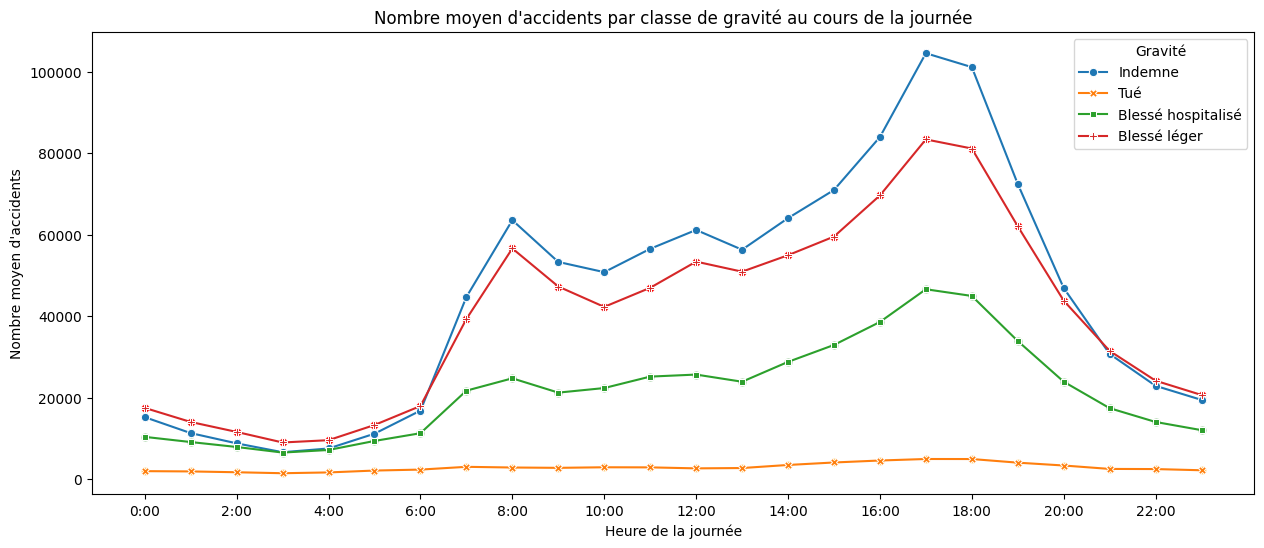

In [ ]:
# Créer un DataFrame pour les moyennes des accidents par classe de gravité et par heure
mean_accidents_df = df.groupby(['hour_cat', 'grav']).size().unstack()

# Réorganiser les colonnes pour que les classes de gravité soient dans l'ordre
mean_accidents_df = mean_accidents_df[[1, 2, 3, 4]]

# Définir l'ordre des labels pour 'grav'
grav_labels = ['Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger']

# Créer le graphique avec Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=mean_accidents_df, dashes=False, markers=True)

# Créer un scatterplot pour les points de données
sns.scatterplot(x=mean_accidents_df.index, y=mean_accidents_df[1], color='blue', label='Indemne', legend=False)
sns.scatterplot(x=mean_accidents_df.index, y=mean_accidents_df[2], color='orange', label='Tué', legend=False)
sns.scatterplot(x=mean_accidents_df.index, y=mean_accidents_df[3], color='green', label='Blessé hospitalisé', legend=False)
sns.scatterplot(x=mean_accidents_df.index, y=mean_accidents_df[4], color='red', label='Blessé léger', legend=False)

# Définir les étiquettes des axes x avec un pas de temps de 2
plt.xticks(ticks=range(0, 24, 2), labels=[f"{hour}:00" for hour in range(0, 24, 2)])

# Ajouter un titre et des étiquettes aux axes
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre moyen d\'accidents')
plt.title('Nombre moyen d\'accidents par classe de gravité au cours de la journée')

# Afficher la légende personnalisée
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = {str(label): grav_labels[label - 1] for label in mean_accidents_df.columns}
plt.legend(handles, custom_labels.values(), title='Gravité')

# Afficher le graphique
plt.show()

#### Creation de age_category

##### Création de age_category

In [ ]:
# Calculer l'âge de l'usager au moment de l'accident en soustrayant l'année de naissance de l'année de l'accident
df['age_usag'] = df['an'] - df['an_nais']

# Afficher les premières lignes du DataFrame pour vérifier
print(df[['an_nais', 'an', 'age_usag']].head())


class AgeCat(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        return None
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return pd.DataFrame(pd.cut(X['age_usag'], bins = [0, 12, 18, 30, 58, np.max(df.age_usag)], labels=['Enfant','Adolescent',
                                                                                                    'Jeune adulte','Adulte',
                                                                                                    'Senior']))


# Créer un transformateur personnalisé pour binariser l'âge des usagers
age_categorized = AgeCat()

# Appliquer le transformateur sur les données
df['age_category'] = age_categorized.fit_transform(df[['age_usag']])

# Afficher les premières lignes du DataFrame avec la nouvelle variable
print(df[['age_usag', 'age_category']].head())


  an_nais    an age_usag
0  1976.0  2005     29.0
1  1968.0  2005     37.0
2  1964.0  2005     41.0
3  2004.0  2005      1.0
4  1998.0  2005      7.0
  age_usag  age_category
0     29.0  Jeune adulte
1     37.0        Adulte
2     41.0        Adulte
3      1.0        Enfant
4      7.0        Enfant


In [ ]:
df.duplicated().value_counts()

False    1151329
Name: count, dtype: int64

##### Graphique Age_cat

C:\Users\campa\AppData\Local\Temp\ipykernel_7576\3666223131.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['age_category', 'grav_description']).size().reset_index(name='count')


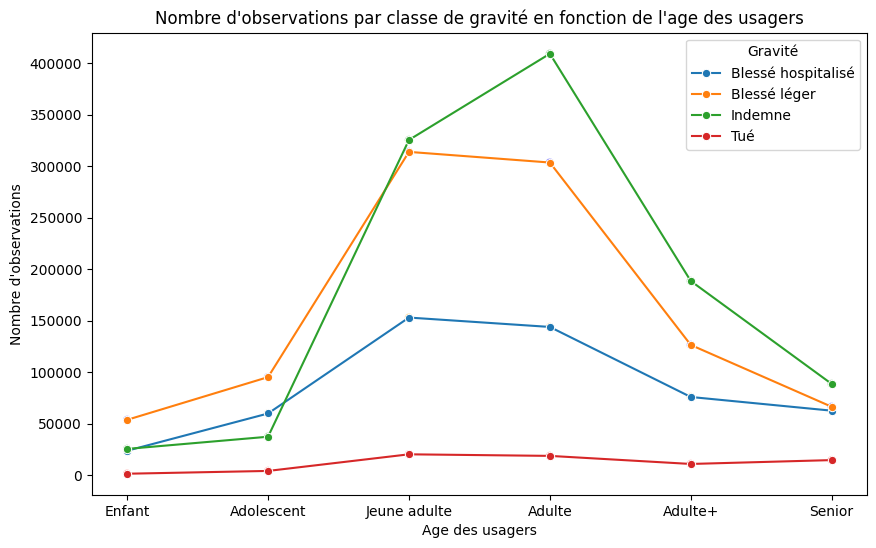

In [ ]:
# Mapper les valeurs de gravité aux descriptions correspondantes
grav_mapping = {1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}

# Remplacer les valeurs de 'grav' par les descriptions correspondantes
df['grav_description'] = df['grav'].map(grav_mapping)

# Regrouper les données par 'age_category' et 'grav' et compter le nombre d'observations
agg_df = df.groupby(['age_category', 'grav_description']).size().reset_index(name='count')

# Créer le graphique avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='age_category', y='count', hue='grav_description', marker='o')

# Définir les couleurs pour chaque classe de gravité
palette = {'Indemne': 'green', 'Tué': 'red', 'Blessé léger': 'blue', 'Blessé hospitalisé': 'orange'}

# Créer un scatterplot pour les points de données avec la palette spécifiée
sns.scatterplot(x=agg_df['age_category'], y=agg_df['count'], hue=agg_df['grav_description'], palette=palette, legend=False)

# Ajouter un titre et des étiquettes aux axes
plt.xlabel('Age des usagers')
plt.ylabel('Nombre d\'observations')
plt.title('Nombre d\'observations par classe de gravité en fonction de l\'age des usagers')

# Afficher la légende
plt.legend(title='Gravité')

# Afficher le graphique
plt.show()


#### Création de la variable jour_semaine

##### Création de jour_sem

In [ ]:
def jour_de_la_semaine(date):
    jours = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]
    return jours[date.weekday()]

df["hrmn"] = df["hrmn"].apply(lambda x: str(x).zfill(4))

df["datetime_str"] = (
    df["an"].astype(str)
    + "-"
    + df["mois"].astype(str)
    + "-"
    + df["jour"].astype(str)
    + " "
    + df["hrmn"]
)
df["datetime"] = pd.to_datetime(df["datetime_str"], format="%Y-%m-%d %H:%M")
df["jour_sem"] = df["datetime"].apply(jour_de_la_semaine)
# + clear cols temp
df["jour_sem"].unique()

array(['Mercredi', 'Vendredi', 'Mardi', 'Lundi', 'Samedi', 'Dimanche',
       'Jeudi'], dtype=object)

In [ ]:
df.duplicated().value_counts()

False    2630673
Name: count, dtype: int64

##### Visualisation de gravité en fonction de jour_sem

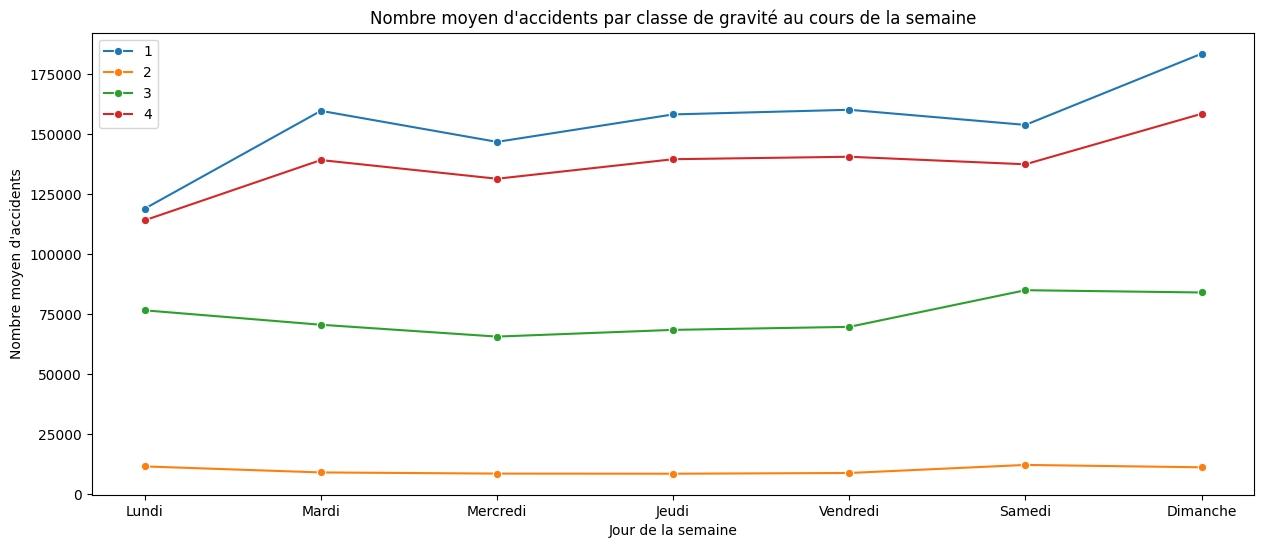

In [ ]:
# Créer un DataFrame pour les moyennes des accidents par classe de gravité et par jour de la semaine
mean_accidents_df = df.groupby(['jour_sem', 'grav']).size().unstack()

# Définir l'ordre des labels pour 'grav'
grav_labels = ['Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger']

# Créer le graphique avec Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=mean_accidents_df, dashes=False, marker='o')

# Définir les étiquettes des axes x avec les jours de la semaine
jour_semaine_labels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
plt.xticks(ticks=range(7), labels=jour_semaine_labels)

# Ajouter un titre et des étiquettes aux axes
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre moyen d\'accidents')
plt.title('Nombre moyen d\'accidents par classe de gravité au cours de la semaine')
plt.legend()

# Afficher le graphique
plt.show()


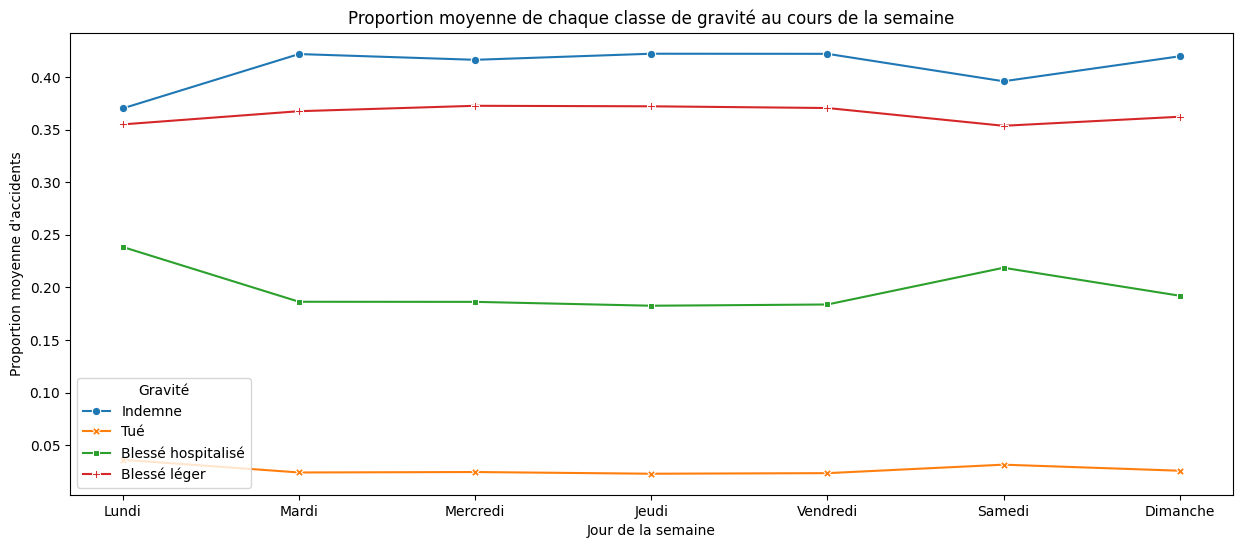

In [ ]:
# Calculer la proportion moyenne de chaque classe de 'grav' au cours de la semaine
prop_accidents_df = mean_accidents_df.div(mean_accidents_df.sum(axis=1), axis=0)

# Créer le graphique avec Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=prop_accidents_df, dashes=False, markers=True)

# Définir les étiquettes des axes x avec les jours de la semaine
jour_semaine_labels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
plt.xticks(ticks=range(7), labels=jour_semaine_labels)

# Ajouter un titre et des étiquettes aux axes
plt.xlabel('Jour de la semaine')
plt.ylabel('Proportion moyenne d\'accidents')
plt.title('Proportion moyenne de chaque classe de gravité au cours de la semaine')

# Afficher la légende personnalisée
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = {str(label): grav_labels[label - 1] for label in prop_accidents_df.columns}
plt.legend(handles, custom_labels.values(), title='Gravité')

# Afficher le graphique
plt.show()


### 4.7 Encoder age_cat et jour_sem

In [ ]:
# Créer une instance de LabelEncoder pour 'age_category'
label_encoder_age_category = LabelEncoder()
df['age_category_encoded'] = label_encoder_age_category.fit_transform(df['age_category'])

# Créer une instance de LabelEncoder pour 'jour_sem'
label_encoder_jour_sem = LabelEncoder()
df['jour_sem_encoded'] = label_encoder_jour_sem.fit_transform(df['jour_sem'])

In [ ]:
# Créer une instance de LabelEncoder pour 'age_category'
label_encoder_age_category = LabelEncoder()
df['age_category_encoded'] = label_encoder_age_category.fit_transform(df['age_category'])

In [ ]:
df.duplicated().value_counts()

False    1151329
Name: count, dtype: int64

In [ ]:
# Afficher un aperçu des colonnes 'age_category' et 'age_category_encoded'
print(df[['age_category', 'age_category_encoded']].head())

print(df[['jour_sem', 'jour_sem_encoded']].head())

   age_category  age_category_encoded
0  Jeune adulte                     3
1        Adulte                     1
2        Adulte                     1
3        Enfant                     2
4        Enfant                     2
   jour_sem  jour_sem_encoded
0  Mercredi                 4
1  Mercredi                 4
2  Mercredi                 4
3  Mercredi                 4
4  Mercredi                 4


### 4.8 Suppression des variables Temps : an, an_nais, jour, mois, hrmn, age_usag, datetime_str, datetime

In [ ]:
# Suppression des variables "Temps" du DataFrame df.
df.drop(columns=['an', 'an_nais', 'jour', 'mois', 'hrmn', 'age_usag', 'datetime_str', 'datetime', 'age_category', 'jour_sem'], inplace=True)

In [ ]:
df.drop(columns=[ 'col'], inplace=True)

In [ ]:
df.shape

(2632301, 23)

In [ ]:
df.head()

,place,catu,grav,sexe,catv,obsm,choc,manv,lum,agg,int,atm,catr,circ,prof,plan,surf,infra,situ,hour_cat,age_category_encoded,jour_sem_encoded
0,1.0,1,3,1.0,3.0,3.0,2.0,1.0,1.0,1,2.0,1.0,3,2.0,1.0,3.0,1.0,0.0,1.0,1.0,4,4
1,1.0,1,1,1.0,3.0,3.0,2.0,4.0,1.0,1,2.0,1.0,3,2.0,1.0,3.0,1.0,0.0,1.0,1.0,1,4
2,1.0,1,1,1.0,3.0,2.0,1.0,1.0,1.0,2,4.0,3.0,4,2.0,1.0,2.0,1.0,0.0,1.0,1.0,4,2
3,1.0,3,4,1.0,3.0,2.0,1.0,1.0,1.0,2,4.0,3.0,4,2.0,1.0,2.0,1.0,0.0,1.0,1.0,4,2
4,1.0,1,3,1.0,2.0,3.0,2.0,1.0,1.0,2,2.0,1.0,3,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0


In [ ]:
df.duplicated().value_counts()

False    826025
True     325304
Name: count, dtype: int64

### 4.9 Conversion des variables object encodées en integer en vue de SelectKBest Chi²

In [ ]:
# Parcourir toutes les colonnes du DataFrame
for col in df.columns:
    if df[col].dtype == 'object':
        # Convertir la colonne en type 'int'
        df[col] = df[col].astype('int')

In [ ]:
df.duplicated().value_counts()

False    479283
True     143023
Name: count, dtype: int64

In [ ]:
df_save3 = df

In [ ]:
df.shape

(1151329, 22)

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
df.duplicated().value_counts()

False    826025
Name: count, dtype: int64

In [ ]:
df.shape

(622306, 22)

In [ ]:
df.head()

,place,catu,grav,sexe,catv,obsm,choc,manv,lum,agg,int,atm,catr,circ,prof,plan,surf,infra,situ,hour_cat,age_category_encoded,jour_sem_encoded
0,1,1,3,1,3,3,2,1,1,1,2,1,3,2,1,3,1,0,1,1.0,4,4
1,1,1,1,1,3,3,2,4,1,1,2,1,3,2,1,3,1,0,1,1.0,1,4
2,1,1,1,1,3,2,1,1,1,2,4,3,4,2,1,2,1,0,1,1.0,4,2
3,1,3,4,1,3,2,1,1,1,2,4,3,4,2,1,2,1,0,1,1.0,4,2
4,1,1,3,1,2,3,2,1,1,2,2,1,3,2,1,1,1,0,1,1.0,1,0


### 4.10 SelectKBest - Chi² 

In [ ]:
# Diviser les données en fonction des caractéristiques (X) et de la cible (y)
X = df.drop(columns=['grav'])  # Caractéristiques
y = df['grav']  # Cible

In [ ]:
k_best = SelectKBest(chi2, k=23)
k_best.fit_transform(X, y)

array([[ 1,  1,  1, ..., 17,  3,  4],
       [ 1,  1,  2, ..., 17,  1,  4],
       [ 2,  2,  1, ..., 17,  1,  4],
       ...,
       [ 1,  1,  2, ...,  1,  4,  5],
       [ 1,  1,  1, ...,  1,  3,  3],
       [ 1,  1,  1, ...,  1,  3,  3]], dtype=int64)

Chi² sur la période 2014-2022

In [ ]:
# Créer un DataFrame pour stocker les résultats du test chi²
chi2_results = pd.DataFrame({'Variable': X.columns, 'Chi2 Score': k_best.scores_})

# Trier les résultats par score chi² de manière décroissante
chi2_results_sorted = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Calculer la somme des scores chi² de toutes les variables
total_chi2_score = chi2_results_sorted['Chi2 Score'].sum()

# Créer une colonne pour stocker la proportion de chaque variable
chi2_results_sorted['Proportion'] = (chi2_results_sorted['Chi2 Score'] / total_chi2_score) * 100

# Afficher les résultats avec la nouvelle colonne
print(chi2_results_sorted)


                Variable    Chi2 Score  Proportion
4                   obsm  58126.738717   17.382539
1                   catu  53399.534931   15.968890
3                   catv  42522.293551   12.716100
0                  place  33915.195249   10.142186
11                   col  21672.857243    6.481170
18                  situ  17854.678925    5.339361
6                   manv  16503.984341    4.935442
5                   choc  15363.965494    4.594525
8                    agg  13895.489751    4.155383
15                  plan  13477.737438    4.030457
9                    int  11769.974705    3.519758
19              hour_cat   5979.776602    1.788225
20  age_category_encoded   5792.179580    1.732125
10                   atm   5364.240487    1.604152
2                   sexe   4943.932162    1.478461
12                  catr   3992.896491    1.194058
7                    lum   3838.329720    1.147835
16                  surf   2058.214130    0.615500
17                 infra   1551

Chi² sur la période 2005-2022

In [ ]:
# Créer un DataFrame pour stocker les résultats du test chi²
chi2_results = pd.DataFrame({'Variable': X.columns, 'Chi2 Score': k_best.scores_})

# Trier les résultats par score chi² de manière décroissante
chi2_results_sorted = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Calculer la somme des scores chi² de toutes les variables
total_chi2_score = chi2_results_sorted['Chi2 Score'].sum()

# Créer une colonne pour stocker la proportion de chaque variable
chi2_results_sorted['Proportion'] = (chi2_results_sorted['Chi2 Score'] / total_chi2_score) * 100

# Afficher les résultats avec la nouvelle colonne
print(chi2_results_sorted)


                Variable    Chi2 Score  Proportion
1                   catu  13042.337107   18.825743
3                   catv  12423.584363   17.932615
4                   obsm   9166.027061   13.230548
16                 infra   6197.838366    8.946166
0                  place   6024.293854    8.695666
6                   manv   5341.546974    7.710167
8                    agg   3315.803285    4.786141
14                  plan   2669.596951    3.853385
17                  situ   2602.285942    3.756226
19  age_category_encoded   2389.466282    3.449035
9                    int   2277.784039    3.287829
2                   sexe   1225.571859    1.769031
7                    lum    770.298322    1.111874
11                  catr    513.817802    0.741662
18              hour_cat    424.942918    0.613377
5                   choc    276.893031    0.399677
12                  circ    272.819695    0.393797
13                  prof    151.790970    0.219100
20      jour_sem_encoded    112

## 5. OneHot Encoded via get_dummies de df - 8 variables - 2005-2022

In [ ]:
y = df['grav']  # Cible

In [ ]:
# Liste des variables à conserver = 8 variables
variables_a_garder = ['catu', 'catv', 'obsm', 'place', 'manv', 'situ', 'agg', 'plan']

# Garder seulement les colonnes spécifiées
df = df.filter(variables_a_garder)
df.shape

(2632301, 8)

In [ ]:

df = df.astype('object')
# Créer un nouveau DataFrame avec les variables catégorielles encodées en one-hot

df1 = df
df_encoded = pd.get_dummies(df1)


In [ ]:
# Afficher le nouveau DataFrame
df_encoded.shape

X = df_encoded  # Caractéristiques

In [ ]:
df_encoded.shape

(2632301, 48)

In [ ]:
# Diviser l'ensemble de données en ensembles d'entraînement et de test tout en conservant les proportions de la cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer l'undersampling sur l'ensemble d'entraînement
rus = RandomUnderSampler(random_state=42, sampling_strategy='auto')
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

## 5.BIS X, y, OneHotEncoded - Train et Test set et undersampling à 15 variables - 2014-2022

In [ ]:
y = df['grav']  # Cible

In [ ]:
# Liste des variables à conserver = 15 variables
variables_a_garder_14 = ['catu', 'catv', 'obsm', 'place', 'manv', 'situ', 'agg', 'plan', 'age_category_encoded', 'int', 'sexe', 'lum', 'hour_cat', 'catr', 'choc']

# Garder seulement les colonnes spécifiées
df_14 = df.filter(variables_a_garder_14)
df_14.shape

(826025, 15)

In [ ]:
df_14 = df_14.astype('object')
# Créer un nouveau DataFrame avec les variables catégorielles encodées en one-hot

df14 = df_14
df_encoded_14 = pd.get_dummies(df_14, drop_first = True)

In [ ]:
X = df_encoded_14 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Appliquer l'undersampling sur X et y en spécifiant un random_state
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
# Créer un dossier pour stocker les fichiers CSV si ce dossier n'existe pas déjà
output_folder = "train_test_data"

if not os.path.exists(output_folder):

    os.makedirs(output_folder)

# Exporter les données d'entraînement et de test en CSV

datasets = {'train': (X_train, y_train), 'test': (X_test, y_test)}

for dataset_name, (X, y) in datasets.items():

    # Convertir X et y en DataFrames pandas

    X_df = pd.DataFrame(X)

    y_df = pd.DataFrame(y)
    

    # Concaténer X et y en un seul DataFrame

    dataset_df = pd.concat([X_df, y_df], axis=1)
    

    # Exporter le DataFrame au format CSV

    output_filename = os.path.join(output_folder, f"{dataset_name}_data15variables_dropFirst_stratified_NoDoublons.csv")

    dataset_df.to_csv(output_filename, index=False)